<a href="https://colab.research.google.com/github/bellington90/class-python-projects/blob/main/project3/python_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install kaggle

In [3]:
import os
import shutil

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json into the correct folder
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

print("Kaggle setup complete.")

Kaggle setup complete.


In [4]:
!kaggle datasets list | head

ref                                                              title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025                 Spotify Global Music Dataset (2009–2025)          1289021  2025-11-11 09:43:05.933000          16387        416  1.0              
neurocipher/heartdisease                                         Heart Disease                                        3491  2025-12-11 15:29:14.327000           2114         73  1.0              
prince7489/gaming-hours-vs-academic-and-work-performance         Gaming Hours vs Academic & Work Performance         15335  2025-12-16 15:27:08.140000             40         24  0.9411765        
kundanbedmutha/exam-

In [5]:
!kaggle datasets download -d neurocipher/heartdisease

Dataset URL: https://www.kaggle.com/datasets/neurocipher/heartdisease
License(s): apache-2.0
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 14.5MB/s]


In [6]:
!unzip heartdisease.zip

Archive:  heartdisease.zip
  inflating: Heart_Disease_Prediction.csv  


In [7]:
!ls

Heart_Disease_Prediction.csv  heartdisease.zip	sample_data


In [8]:
import pandas as pd

df = pd.read_csv("Heart_Disease_Prediction.csv")

In [9]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [11]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [12]:
df["Heart Disease"].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [13]:
df.groupby("Heart Disease")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
Absence,150.0,52.706667,9.509830,29.0,45.0,52.0,59.0,76.0
Presence,120.0,56.591667,8.116273,35.0,52.0,58.0,62.0,77.0


/tmp/ipython-input-3649707579.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


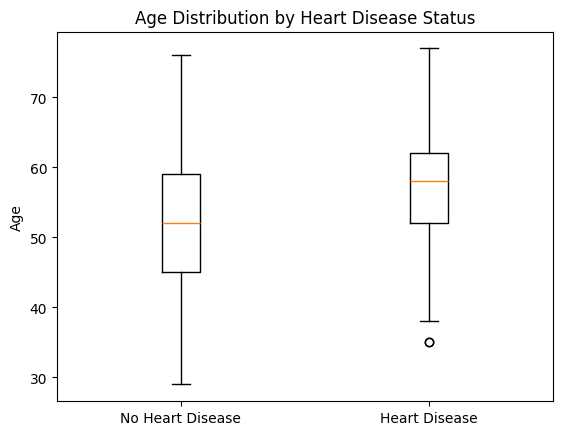

In [14]:
import matplotlib.pyplot as plt

plt.boxplot(
    [
        df[df["Heart Disease"] == "Absence"]["Age"],
        df[df["Heart Disease"] == "Presence"]["Age"]
    ],
    labels=["No Heart Disease", "Heart Disease"]
)

plt.title("Age Distribution by Heart Disease Status")
plt.ylabel("Age")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d91ca8d49e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d91ca8d5040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d91ca8d4710>,
 'medians': [<matplotlib.lines.Line2D at 0x7d91ca8d5430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d91ca8d5730>,
 'means': []}

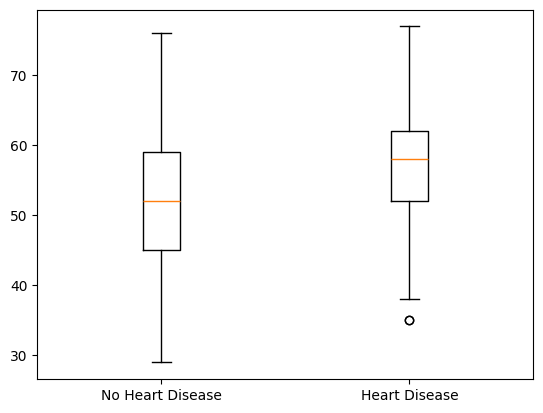

In [15]:
plt.boxplot(
    [
        df[df["Heart Disease"] == "Absence"]["Age"],
        df[df["Heart Disease"] == "Presence"]["Age"]
    ],
    tick_labels=["No Heart Disease", "Heart Disease"]
)

Based on this dataset, patients labeled with heart disease tend to be older overall than patients labeled without heart disease. The summary statistics and the box plot both point to a higher typical age in the heart disease group, even though there is still overlap between the two groups. In this sample, age looks like a meaningful factor to pay attention to when comparing heart disease status.
